In [35]:
import matplotlib.pyplot as plt
import re

In [36]:
#记录每条流每时的速率
flows = {}
#flows[12] = [1,2]
#print(flows[12])

In [37]:
#按行读取文件
#file_path = 'FIFO_RES'
file_path = 'AFQ_RES1'
with open(file_path) as f:
    for line in f:
        # print(line)
        result = re.match(r'\[ (\d)*\].*',line)
        if result:
            # print(result.group())
            # print(re.search(r'\[ (\d)*\]',line).group())
            index = re.search(r'\[ (\d)*\]',line).group()
            if index not in flows:
                flows[index] = []
                # print(index)
            else:
                value = re.search(r'(((\d)*)((\.)?)((\d)*) Mbits/sec)|(((\d)*)((\.)?)((\d)*) Kbits/sec)',line)
                if value:
                    value = value.group()
                    # print(index,value)
                    flows[index].append(value)
print(flows)

{'[ 12]': ['1.02 Mbits/sec', '588 Kbits/sec', '541 Kbits/sec', '447 Kbits/sec', '541 Kbits/sec', '470 Kbits/sec', '517 Kbits/sec', '470 Kbits/sec', '517 Kbits/sec', '470 Kbits/sec', '557 Kbits/sec'], '[ 13]': ['353 Kbits/sec', '529 Kbits/sec', '459 Kbits/sec', '529 Kbits/sec', '494 Kbits/sec', '506 Kbits/sec', '482 Kbits/sec', '506 Kbits/sec', '482 Kbits/sec', '506 Kbits/sec', '443 Kbits/sec']}


In [38]:
for index in flows:
    # print(flows[index])
    for ind,value in enumerate(flows[index]):
        # print(ind,value)
        if value[-9:] == 'Mbits/sec':
            # print(ind,value)
            value = float(value[:-9])
            value *= 1000
            flows[index][ind] = value
        elif value[-9:] == 'Kbits/sec':
            value = float(value[:-9])
            flows[index][ind] = value
#数据对齐 fifo
#flows['[ 12]'] = flows['[ 12]'][1:]
#flows['[ 13]'] = flows['[ 13]'][:-1]

#数据对齐 afq
flows['[ 12]'] = flows['[ 12]'][1:]
flows['[ 13]'] = flows['[ 13]'][:-1]
print(flows)

{'[ 12]': [588.0, 541.0, 447.0, 541.0, 470.0, 517.0, 470.0, 517.0, 470.0, 557.0], '[ 13]': [353.0, 529.0, 459.0, 529.0, 494.0, 506.0, 482.0, 506.0, 482.0, 506.0]}


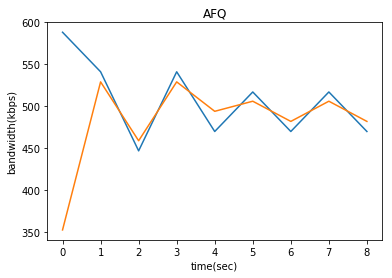

In [39]:
#正式画图
fig = plt.figure()
plt.title('AFQ')
plt.ylabel('bandwidth(kbps)')
plt.xlabel('time(sec)')
for index in flows:
    plt.plot(flows[index][:-1])
plt.savefig("AFQ.png")
plt.show()